<a href="https://colab.research.google.com/github/SeanDeluski/DSP-539/blob/main/Data%20visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###### Set Up #####
# verify our folder with the data and module assets is installed
# if it is installed make sure it is the latest
!test -e ds-assets && cd ds-assets && git pull && cd ..
# if it is not installed clone it
!test ! -e ds-assets && git clone https://github.com/IndraniMandal/ds-assets.git
# point to the folder with the assets
home = "ds-assets/assets/"
import sys
sys.path.append(home)      # add home folder to module search path

Cloning into 'ds-assets'...
remote: Enumerating objects: 205, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 205 (delta 54), reused 50 (delta 50), pack-reused 147 (from 1)
Receiving objects: 100% (205/205), 12.58 MiB | 19.79 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#imports the dataset frm google drive
url = "https://docs.google.com/spreadsheets/d/1lDEHKeX5n37xJJR7pp2e0pv6WUUx3uHK1bdVUVJveB0/export?format=csv"
noshow_df = pd.read_csv(url)
noshow_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


QUESTION 1
----------------------------------------------------------------------------------------------------------------------------
Are your numerical independent variables uni- or multimodal? Validate your answer with appropriate density plots/histograms.
The distribution seems to be multimodal according the density plot and histogram as both have multiple peaks regarding the age distribution.
----------------------------------------------------------------------------------------------------------------------------


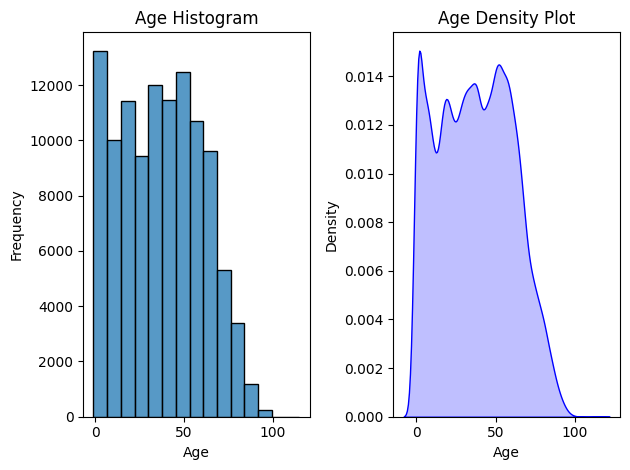

In [ ]:
print('QUESTION 1')
print('----------------------------------------------------------------------------------------------------------------------------')
print('Are your numerical independent variables uni- or multimodal? Validate your answer with appropriate density plots/histograms.')
print('The distribution seems to be multimodal according the density plot and histogram as both have multiple peaks regarding the age distribution.')
print('----------------------------------------------------------------------------------------------------------------------------')

#creates the histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Age'].dropna(), bins=15, kde=False)
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')

#creates the density plot
plt.subplot(1, 2, 2)
sns.kdeplot(df['Age'].dropna(), color='blue', fill=True)
plt.title('Age Density Plot')
plt.xlabel('Age')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------
Can you identify clusters when performing scatter plots? Are those clusters intuitive given the nature of the data set or are they surprising?
No, there does not seem to be any tight clusters, however the values are loosely clustered before the age of 60 in both groups.
--------------------------------------------------------------------------------------------------------------------------------------------------


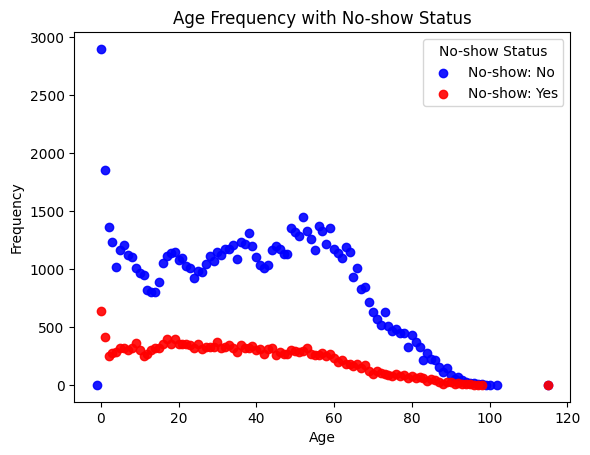

In [ ]:
print('--------------------------------------------------------------------------------------------------------------------------------------------------')
print('Can you identify clusters when performing scatter plots? Are those clusters intuitive given the nature of the data set or are they surprising?')
print('No, there does not seem to be any tight clusters, however the values are loosely clustered before the age of 60 in both groups.')
print('--------------------------------------------------------------------------------------------------------------------------------------------------')

#counts age and groups by no show status
age_counts = noshow_df.groupby(['Age', 'No-show']).size().reset_index(name='Frequency')

#assigns colors
colors = {'No': 'blue', 'Yes': 'red'}

#plots by category
for no_show_status in age_counts['No-show'].unique():
    subset = age_counts[age_counts['No-show'] == no_show_status]
    plt.scatter(subset['Age'], subset['Frequency'],
                alpha=0.9,
                color=colors[no_show_status],
                label=f'No-show: {no_show_status}')

#labels
plt.title('Age Frequency with No-show Status')
plt.xlabel('Age')
plt.ylabel('Frequency')

#legend
plt.legend(title='No-show Status')

plt.show()


In [ ]:
print('--------------------------------------------------------------------------------------------------------------------------------------------------')
print('Are those clusters related to your decision tree model from the last lab?')
print('Yes I belive they are related.')
print('--------------------------------------------------------------------------------------------------------------------------------------------------')

--------------------------------------------------------------------------------------------------------------------------------------------------
Are those clusters related to your decision tree model from the last lab?
Yes I belive they are related.
--------------------------------------------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------
What about the different labels/levels of your dependent variable - are they equally represented, that is, is your data set well balanced? If so why, if not how do you think the imbalance shows up in your tree model?
My data set is not well balanced since the No-show status or "no" greatly outwieghs the Yes status. I think the imbalance shows in the decision tree because for younger age groups it is typically predicting "no" as the status even though the younger age group has the highest count in the "yes" status.
-------------------------------------------------------------------------------------


Text(0, 0.5, 'Frequency')

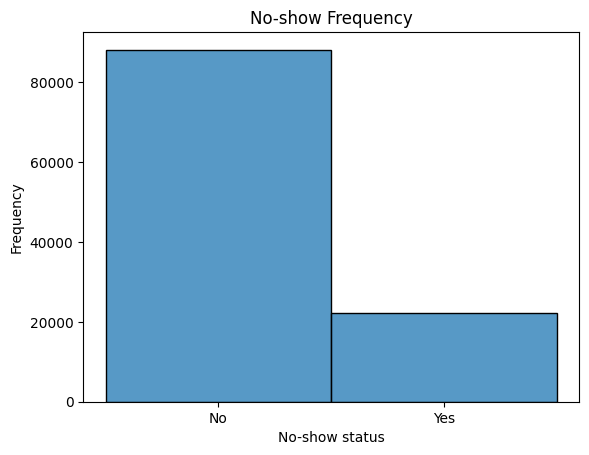

In [ ]:
print('------------------------------------------------------------------------------------')
print('What about the different labels/levels of your dependent variable - are they equally represented, that is, is your data set well balanced? If so why, if not how do you think the imbalance shows up in your tree model?')
print('My data set is not well balanced since the No-show status or "no" greatly outwieghs the Yes status. I think the imbalance shows in the decision tree because for younger age groups it is typically predicting "no" as the status even though the younger age group has the highest count in the "yes" status.')
print('-------------------------------------------------------------------------------------')
sns.histplot(df['No-show'].dropna(), bins=2, kde=False)
plt.title('No-show Frequency')
plt.xlabel('No-show status')
plt.ylabel('Frequency')

In [ ]:
print('QUESTION 2')
print('----------------------------------------------------------------------------------------')
print('As in the previous assignment, build an unrestricted decision tree model of your data and compute its accuracy (using the accuracy_score function).')
print('----------------------------------------------------------------------------------------')
#the last column is the target variable
X = noshow_df.iloc[:, :-1]
y = noshow_df.iloc[:, -1]

#trains the DecisionTreeClassifier
clf = tree.DecisionTreeClassifier(max_depth=None)

#converts categorical data to numerical
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

clf.fit(X, y)

#prediction
y_pred = clf.predict(X)

#calculates accuracy
accuracy = accuracy_score(y, y_pred)
print(f"1. Accuracy: {accuracy}")

QUESTION 2
----------------------------------------------------------------------------------------
As in the previous assignment, build an unrestricted decision tree model of your data and compute its accuracy (using the accuracy_score function).
----------------------------------------------------------------------------------------
1. Accuracy: 1.0


In [ ]:
print('-----------------------------------------------------------------------------------------------------')
print('Find the simplest decision tree model whose accuracy is at least 80% or better than the accuracy of the unrestricted model. E.g. if your unrestricted model had an accuracy of 0.95 then the simplified model should have an accuracy of not less than 0.95*0.8=0.75 or 75%.')
print('The simplest decision tree model with an accuracy of 80% of the unrestricted model has a maximum depth of 8.')
print('-----------------------------------------------------------------------------------------------------')

X = noshow_df.iloc[:, :-1]
y = noshow_df.iloc[:, -1]

#trains the DecisionTreeClassifier
clf = tree.DecisionTreeClassifier(max_depth=8)

#converts categorical data to numerical
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

clf.fit(X, y)

#prediction
y_pred = clf.predict(X)

#calculates accuracy
accuracy = accuracy_score(y, y_pred)
print(f"1. Accuracy: {accuracy}")

-----------------------------------------------------------------------------------------------------
Find the simplest decision tree model whose accuracy is at least 80% or better than the accuracy of the unrestricted model. E.g. if your unrestricted model had an accuracy of 0.95 then the simplified model should have an accuracy of not less than 0.95*0.8=0.75 or 75%.
The simplest decision tree model with an accuracy of 80% of the unrestricted model has a maximum depth of 8.
-----------------------------------------------------------------------------------------------------
1. Accuracy: 0.8014150388592832
